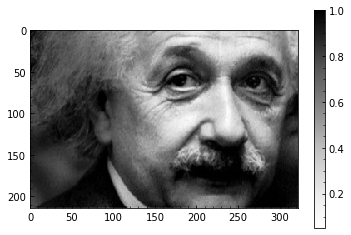

In [32]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.misc
import math
import itertools
from numpy import linalg as LA

#provide the name of the file between quotes (like "eins.jpg")
filename = "eins.jpg"
############################
im2 = scipy.misc.imread(filename,"mode=L")
Nix=im2.shape[0]
Niy=im2.shape[1]
vim=im2.flatten()
vin=1-vim/255.0
dsqin=np.reshape(vin,(Nix,Niy))
dsqor=dsqin[0:Nix,0:Niy]
hsimage=plt.imshow(dsqor,cmap='Greys',aspect=1,interpolation='none')
plt.colorbar(hsimage)
plt.show(hsimage)    

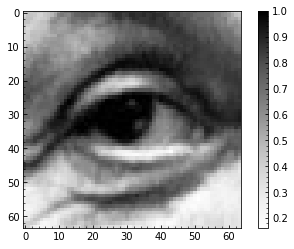

In [31]:
#new size
dsqor=dsqin[30:94,150:214]
hsimage=plt.imshow(dsqor,cmap='Greys',aspect=1,interpolation='none')
plt.colorbar(hsimage)
plt.show(hsimage)   

(-0.5, 63.5, 63.5, -0.5)

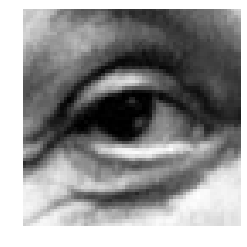

In [3]:
dsqor=dsqin[30:94,150:214]
hsimage=plt.imshow(dsqor,cmap='Greys',aspect=1,interpolation='none')
#plt.colorbar(hsimage)
plt.axis('off')
#plt.savefig("aeye1.jpg",dpi=250)
nplt.show(hsimage)

(-0.5, 63.5, 63.5, -0.5)

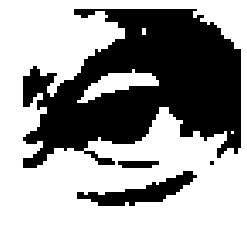

In [37]:
Nix=64
Niy=64
#provide a greycut (contrast) number between 0 and 1
#it converts the grey pixels into black (above greycut) 
#and white (below greycut). 
#Start with greycut=0.5 and move it up and down to see the effect
#Below you see an image of the magnetic field (-1=black, +1=white)
greycut=0.72

#################################

nan=np.ndarray.flatten(dsqor)
nsites=Nix*Niy
#hhbw = [-1 if i < greycut else 1 for i in nan] # 231ms
hhbw=np.zeros(nsites)
for jj in range(nsites):
    if nan[jj]<greycut: 
        hhbw[jj]=-1
    else:
        hhbw[jj]=1
dsq=np.reshape(hhbw,(Nix,Niy))
dsqbw=(np.reshape(hhbw,(Nix,Niy))+1)/2.0
hsimage=plt.imshow(dsqbw,cmap='Greys',aspect=1,interpolation='none')
plt.axis('off')
#plt.savefig("aeye2.jpg",dpi=250)
plt.show(hsimage)

In [40]:
dsqbw.shape

(64, 64)

In [39]:
dsqbw

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
dsqbw[30,30]

1.0

In [16]:
np.sum(dsqbw)

1959.0

In [8]:
linkbw=np.zeros((Nix,Niy,2))

In [11]:
for xx, yy in itertools.product(range(Nix),range(Niy)):
    linkbw[(xx+1)%Nix,yy,1] = (int(round(dsqbw[xx,yy]))
                               +int(round(dsqbw[(xx+1)%Nix,yy])))%2
    linkbw[xx,(yy+1)%Niy,0] = (int(round(dsqbw[xx,yy]))
                               +int(round(dsqbw[xx,(yy+1)%Niy])))%2

In [13]:
linkbw[0,0]

array([ 0.,  0.])

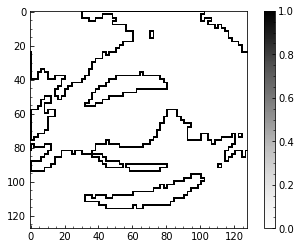

In [12]:
pic=np.zeros((2*Nix,2*Niy),dtype=int)
links=linkbw
for nnn in itertools.product(range(Nix),range(Niy)):
    pic[2*nnn[0]+1,2*nnn[1]]=links[nnn[0],nnn[1],0]
    pic[2*nnn[0],2*nnn[1]+1]=links[nnn[0],nnn[1],1]
    suml=(links[nnn[0],nnn[1],0]+links[nnn[0],nnn[1],1]
    +links[(nnn[0]-1)%Nix,nnn[1],0]+links[nnn[0],(nnn[1]-1)%Niy,1])
    if (suml !=0): pic[2*nnn[0],2*nnn[1]]=1
    pass   

hsimage=plt.imshow(pic,cmap='Greys',aspect=1,interpolation='none')
#plt.gca().invert_yaxis()
plt.colorbar(hsimage)
plt.show(hsimage)

## Using Image class

In [112]:
from image import Image, show
%matplotlib inline

In [113]:
img = Image("eins.jpg")

In [114]:
img_cropped = img.crop(30, 150, 94, 214)

In [115]:
cutoffs = np.arange(0.1, 0.9, 0.1)
images_links = [img.get_boundaries(cutoff) for cutoff in cutoffs]
#img_bw = img.cutoff(0.9, img_cropped)
#cropped_img_bw# = boundary_id.cutoff_image(0.72, cropped_img)

(<matplotlib.figure.Figure at 0x113b4d4a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113b35358>)

(<matplotlib.figure.Figure at 0x1152ebe10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1152e5978>)

(<matplotlib.figure.Figure at 0x115572d68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1155562e8>)

(<matplotlib.figure.Figure at 0x115826668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11582f390>)

(<matplotlib.figure.Figure at 0x115889dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11559c390>)

(<matplotlib.figure.Figure at 0x115d62630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x115d6c390>)

(<matplotlib.figure.Figure at 0x115fd7668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x115ffada0>)

(<matplotlib.figure.Figure at 0x11629b7b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116269e48>)

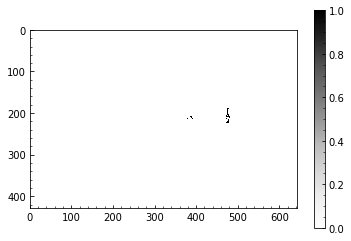

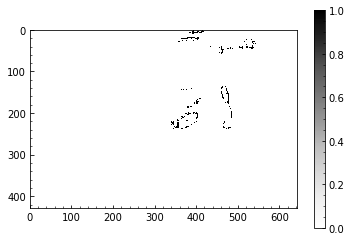

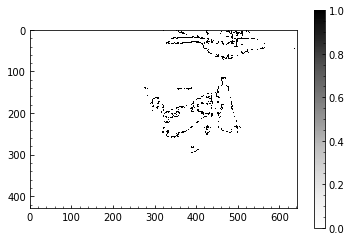

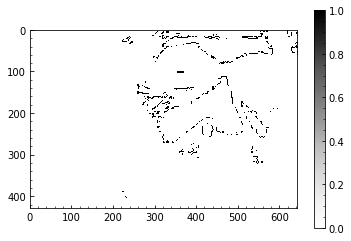

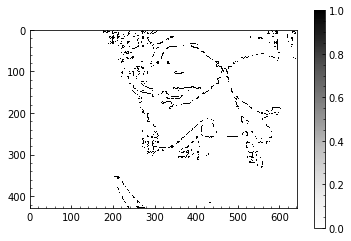

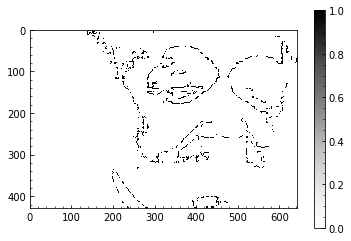

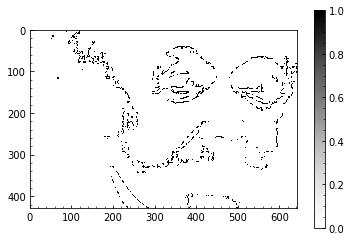

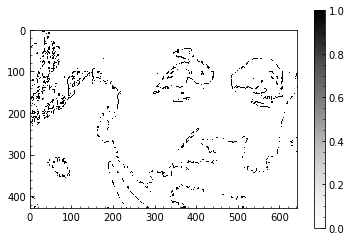

In [111]:
for image in images_links:
    show(image)